## Project Communicate Data Findings

This project aims at demonestrating data visulaisation as part of the ***Advanced Data Analysis Nanodegree Program***

The dataset used for the projeect is ***Loan Data*** from ***Prosper***

In [1]:
# Prepare environment
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv('prosperLoanData.csv')
# Check the shape and the nulls
print('Dataset shape is ',(df.shape))
df.isnull().sum()

Dataset shape is  (113937, 81)


ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [2]:
# Show the head
df.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [3]:
# Referring to the dictionary, we select the columns that are most interesting for project, and we dispaly that to confirm
# For the sake of this small project, we will aim at avoiding colmuns that have much of missing data where possible. It's 
# understood, however, that for larger projects, those columsn could also be studied.

# On the other hand, considering that loans before 2009 seem to be missing important fields, we will focus only on later 
#records, and will dorp records that have nulls for them (those will be pre-July 2009 loans)

dfr = df[['ListingNumber', 'ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
            'EstimatedReturn', 'ProsperScore', 'ListingCategory (numeric)', 'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner',
            'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'IncomeRange', 'IncomeVerifiable', 
            'LoanOriginalAmount']].copy()
print('Dataset shape is ',(dfr.shape))
dfr.head()

Dataset shape is  (113937, 18)


,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedReturn,ProsperScore,ListingCategory (numeric),Occupation,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,IncomeRange,IncomeVerifiable,LoanOriginalAmount
0,193129,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,0,Other,Self-employed,True,640.0,659.0,"$25,000-49,999",True,9425
1,1209647,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,0.0820,0.05470,7.0,2,Professional,Employed,False,680.0,699.0,"$50,000-74,999",True,10000
2,81716,2007-01-05 15:00:47.090000000,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,0,Other,Not available,False,480.0,499.0,Not displayed,True,3001
3,658116,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,0.0874,0.06000,9.0,16,Skilled Labor,Employed,True,800.0,819.0,"$25,000-49,999",True,10000
4,909464,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.2085,0.1985,0.09066,4.0,2,Executive,Employed,True,680.0,699.0,"$100,000+",True,15000


In [4]:
# Check for nulls
dfr.isnull().sum()

ListingNumber                    0
ListingCreationDate              0
Term                             0
LoanStatus                       0
BorrowerAPR                     25
BorrowerRate                     0
LenderYield                      0
EstimatedReturn              29084
ProsperScore                 29084
ListingCategory (numeric)        0
Occupation                    3588
EmploymentStatus              2255
IsBorrowerHomeowner              0
CreditScoreRangeLower          591
CreditScoreRangeUpper          591
IncomeRange                      0
IncomeVerifiable                 0
LoanOriginalAmount               0
dtype: int64

In [5]:
# We see the big number of nulls are those for records before July 2009, so we delete them along with the recrods with nulls
# in other columns, as thet are relatively small number anyway
dfr.dropna(axis = 0, inplace = True)
print('Dataset shape is ',(dfr.shape))
dfr.isnull().sum()

Dataset shape is  (83520, 18)


ListingNumber                0
ListingCreationDate          0
Term                         0
LoanStatus                   0
BorrowerAPR                  0
BorrowerRate                 0
LenderYield                  0
EstimatedReturn              0
ProsperScore                 0
ListingCategory (numeric)    0
Occupation                   0
EmploymentStatus             0
IsBorrowerHomeowner          0
CreditScoreRangeLower        0
CreditScoreRangeUpper        0
IncomeRange                  0
IncomeVerifiable             0
LoanOriginalAmount           0
dtype: int64

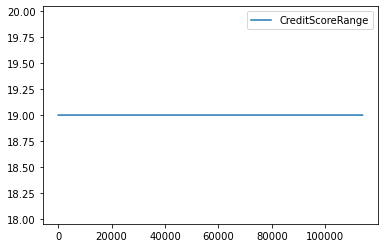

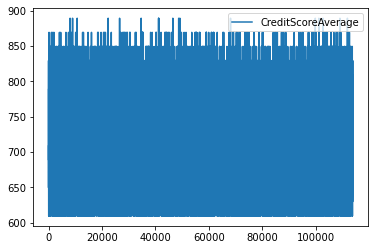

In [6]:
# To simplify things, let's calculate CreditScoreRange (for check) and CreditScoreAverage
dfr['CreditScoreRange'] = dfr['CreditScoreRangeUpper'] - dfr['CreditScoreRangeLower']
dfr['CreditScoreAverage'] = (dfr['CreditScoreRangeLower'] + dfr['CreditScoreRangeUpper'])/2
dfr.plot(y='CreditScoreRange');
dfr.plot(y='CreditScoreAverage');

##### It's rather interesting that the range width is always 19, but that's probably dependant on how the agency claculates it

In [7]:
# We can now drop the range columns
dfr.drop(columns=['CreditScoreRangeUpper', 'CreditScoreRangeLower', 'CreditScoreRange'], inplace = True)

# Now that we have a clean dataset of a manageable size, we need to look at the relationships
# Let's first check what fields are numirc
dfr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83520 entries, 1 to 113936
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ListingNumber              83520 non-null  int64  
 1   ListingCreationDate        83520 non-null  object 
 2   Term                       83520 non-null  int64  
 3   LoanStatus                 83520 non-null  object 
 4   BorrowerAPR                83520 non-null  float64
 5   BorrowerRate               83520 non-null  float64
 6   LenderYield                83520 non-null  float64
 7   EstimatedReturn            83520 non-null  float64
 8   ProsperScore               83520 non-null  float64
 9   ListingCategory (numeric)  83520 non-null  int64  
 10  Occupation                 83520 non-null  object 
 11  EmploymentStatus           83520 non-null  object 
 12  IsBorrowerHomeowner        83520 non-null  bool   
 13  IncomeRange                83520 non-null  ob

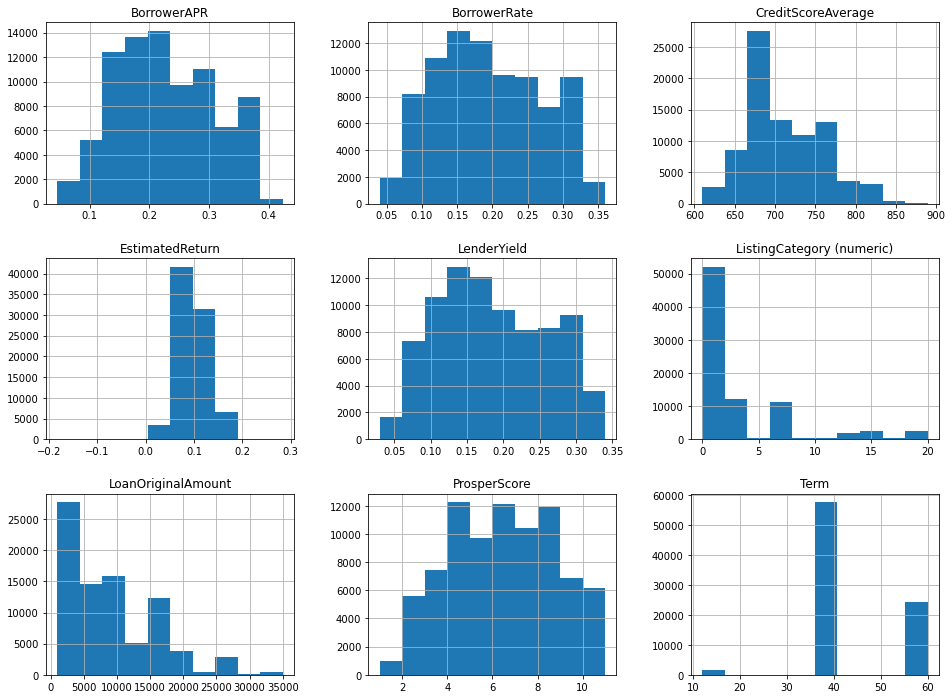

In [8]:
# We create a temporary copy of the dataframe to explore the data
dftemp = dfr[['Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedReturn', 'ProsperScore', 
              'ListingCategory (numeric)', 'CreditScoreAverage', 'LoanOriginalAmount']].copy()
# We have a quick look at the histograms
dftemp.hist(figsize = (16,12));

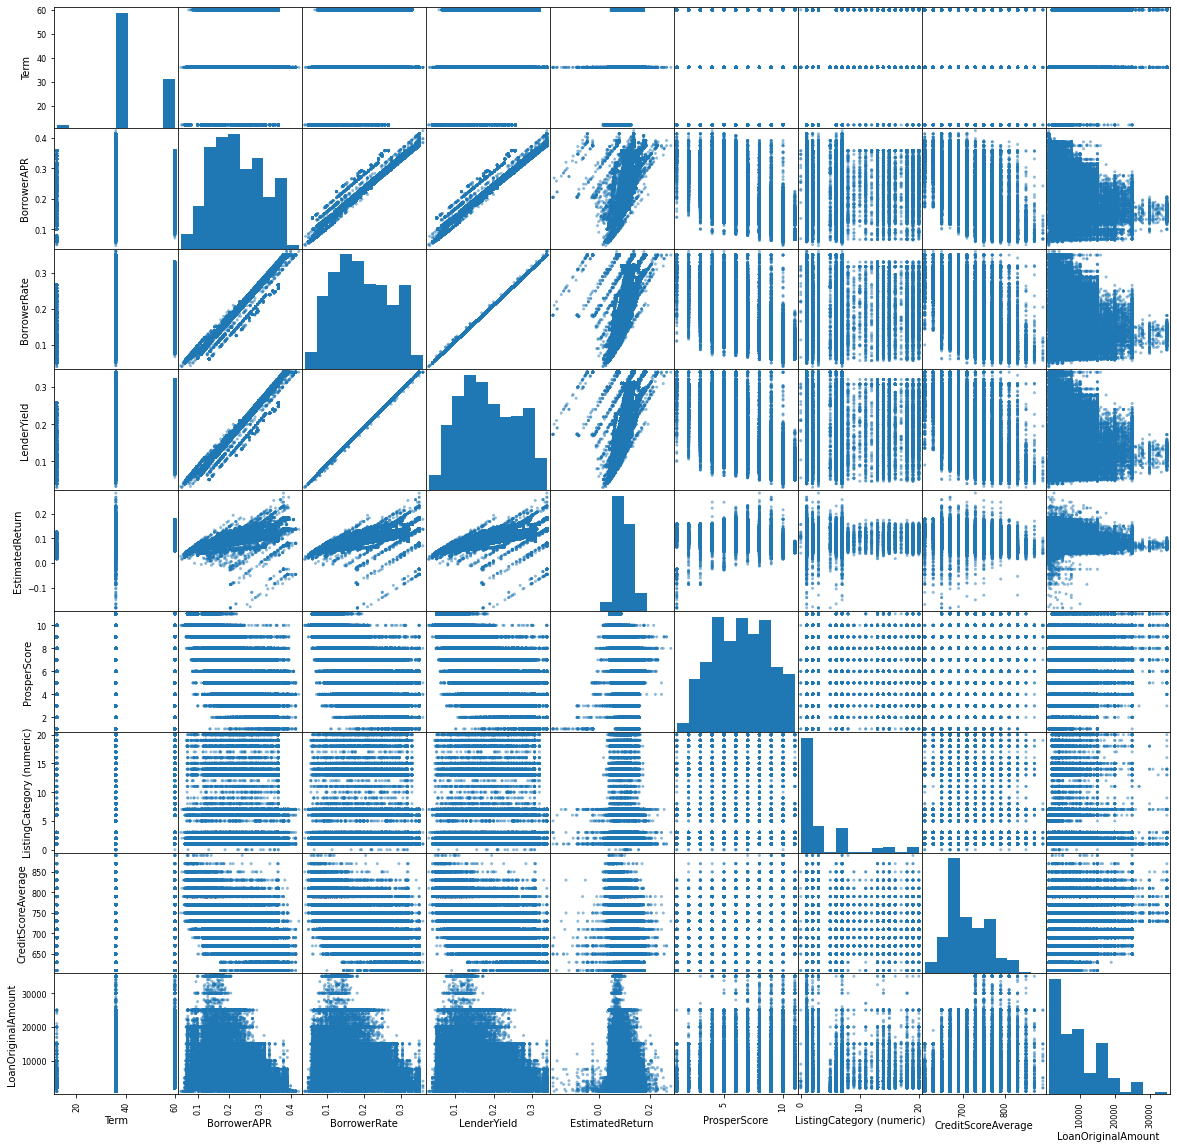

In [9]:
# We draw a scatter matric of the numeric fields
pd.plotting.scatter_matrix(dftemp, figsize = (20,20));

### Now that we have some idea about the distribution of the data and the relationships, we can form some questions.
* What's the mean loan amounts for each listing category? And what's the total?
* How does APR compare to rate (i.e. overhead on borrower)?
* How does yield compare to estimated return (i.e. deductions from lender)?
* How do rates compare to scores?
* How do the term, loan amount and rate relate?
* Does employment status affect the APR? How about occupation?

### Loan Amounts and Categories

In [10]:
# We first replace the numeric category values with the names
cats = {0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 4: 'Personal Loan',
        5: 'Student Use', 6: 'Auto', 7: 'Other', 8: 'Baby&Adoption', 9: 'Boat', 10: 'Cosmetic Procedure',
        11: 'Engagement Ring', 12: 'Green Loans', 13: 'Household Expenses', 14: 'Large Purchases', 15: 'Medical/Dental',
        16: 'Motorcycle', 17: 'RV', 18: 'Taxes', 19: 'Vacation', 20: 'Wedding Loans'}
dfr['ListingCategory (numeric)'].replace(cats, inplace=True)
dfr.rename(columns={'ListingCategory (numeric)': 'ListingCategory'}, inplace=True)
dfr.head()

,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedReturn,ProsperScore,ListingCategory,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,LoanOriginalAmount,CreditScoreAverage
1,1209647,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,0.0820,0.05470,7.0,Home Improvement,Professional,Employed,False,"$50,000-74,999",True,10000,689.5
3,658116,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,0.0874,0.06000,9.0,Motorcycle,Skilled Labor,Employed,True,"$25,000-49,999",True,10000,809.5
4,909464,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.2085,0.1985,0.09066,4.0,Home Improvement,Executive,Employed,True,"$100,000+",True,15000,689.5
5,1074836,2013-12-14 08:26:37.093000000,60,Current,0.15425,0.1314,0.1214,0.07077,10.0,Debt Consolidation,Professional,Employed,True,"$100,000+",True,15000,749.5
6,750899,2013-04-12 09:52:56.147000000,36,Current,0.31032,0.2712,0.2612,0.11070,2.0,Debt Consolidation,Sales - Retail,Employed,False,"$25,000-49,999",True,3000,689.5


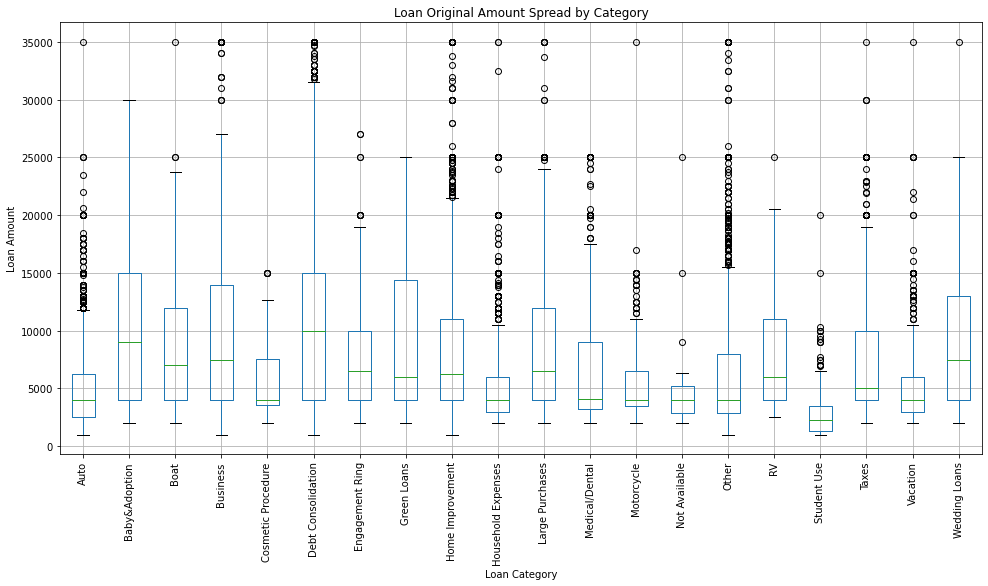

In [11]:
# We plot boxplot to sea the spread of loan value for each category. We will keep sorting by category name for consistency
# with the next figure
dfr.boxplot(column = ['LoanOriginalAmount'], by = ['ListingCategory'], figsize=(16,8));
plt.suptitle('');
plt.title('Loan Original Amount Spread by Category');
plt.xlabel('Loan Category');
plt.ylabel('Loan Amount');
plt.xticks(rotation=90);

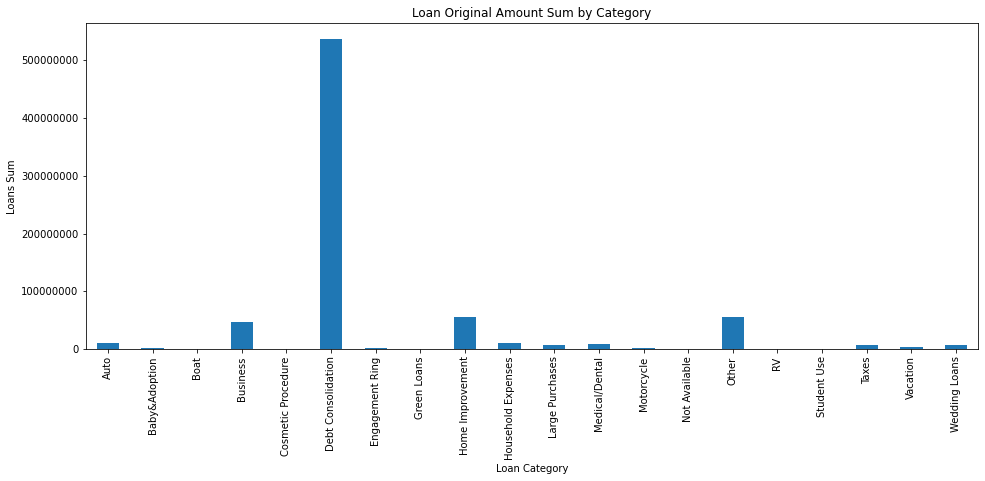

In [12]:
df_cat_amounts = dfr.groupby('ListingCategory')['LoanOriginalAmount'].sum()
axes = df_cat_amounts.plot.bar(figsize=(16,6));
plt.suptitle('');
plt.title('Loan Original Amount Sum by Category');
plt.xlabel('Loan Category');
plt.ylabel('Loans Sum');
plt.xticks(rotation=90);
axes.ticklabel_format(axis='y', style='plain')

### Rates versus Fees and Deductions

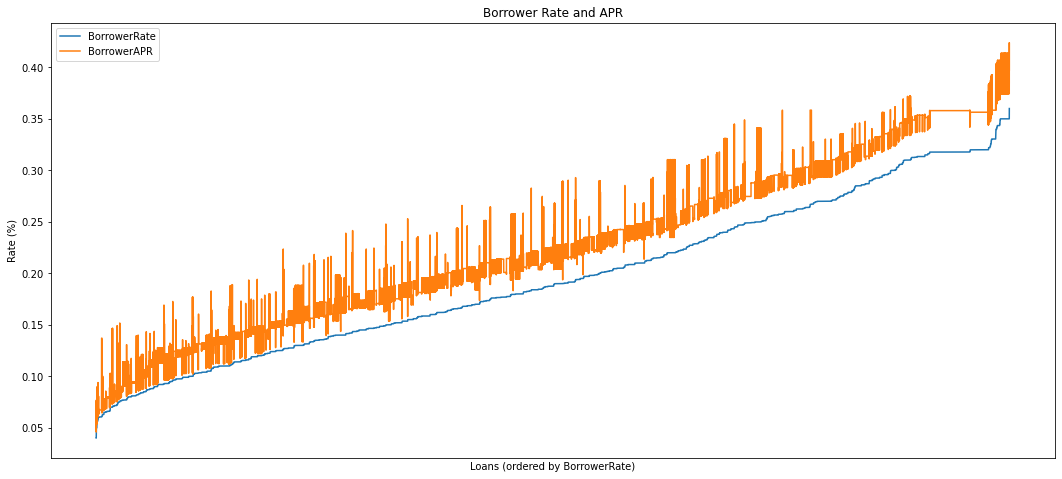

In [13]:
# How does APR compare to rate (i.e. overhead on borrower)?
# Let's first sort by rate
dfr.sort_values(by = 'BorrowerRate', inplace = True, ignore_index = True)
plt.figure(figsize = (18,8))
plt.plot('BorrowerRate', data = dfr);
plt.plot('BorrowerAPR', data = dfr);
plt.title('Borrower Rate and APR');
plt.xlabel('Loans (ordered by BorrowerRate)');
plt.ylabel('Rate (%)');
plt.xticks([], " ");
plt.legend();

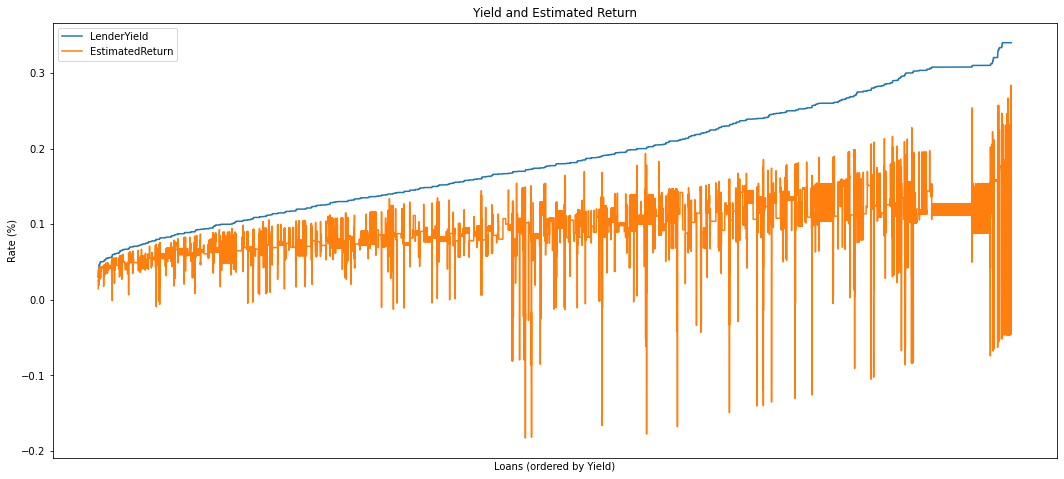

In [14]:
# Simlarly, how does yield compare to estimated return (i.e. deductions from lender)
# Let's first sort by yield
dfr.sort_values(by = 'LenderYield', inplace = True, ignore_index = True)
plt.figure(figsize = (18,8))
plt.plot('LenderYield', data = dfr);
plt.plot('EstimatedReturn', data = dfr);
plt.title('Yield and Estimated Return');
plt.xlabel('Loans (ordered by Yield)');
plt.ylabel('Rate (%)');
plt.xticks([], " ");
plt.legend();

##### It appears that the difference between Borrower Rate and APR does not change much (with the exception of loans for lower rates, while we see steady increase in the difference between Lender Yield and Estimated Return as the yield increases.

###### Both plots have fluctuation in the differences, though it is more apparent for the investor.


### Rates versus Scores

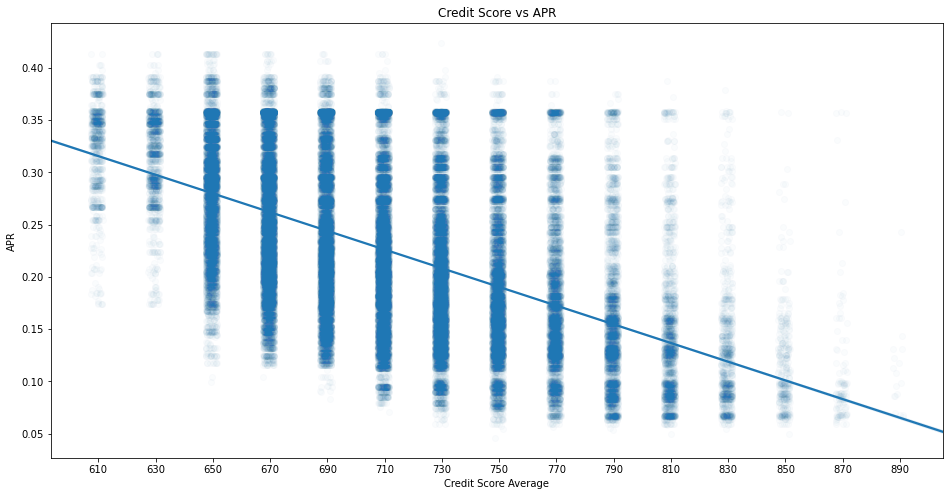

In [15]:
plt.figure(figsize=(16,8));
sb.regplot(data = dfr, x = 'CreditScoreAverage', y = 'BorrowerAPR', truncate=False, x_jitter=2, scatter_kws={'alpha':1/50});
plt.title('Credit Score vs APR');
plt.xlabel('Credit Score Average');
plt.ylabel('APR');
plt.xticks(np.arange(610, 910, 20));

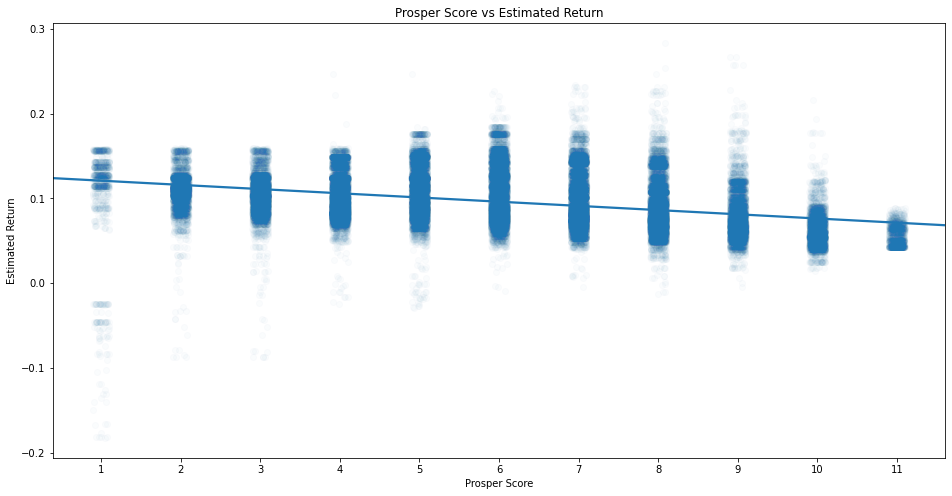

In [16]:
plt.figure(figsize=(16,8));
sb.regplot(data = dfr, x = 'ProsperScore', y = 'EstimatedReturn', truncate=False, x_jitter=0.1, scatter_kws={'alpha':1/50});
plt.title('Prosper Score vs Estimated Return');
plt.xlabel('Prosper Score');
plt.ylabel('Estimated Return');
plt.xticks(np.arange(1, 12));

##### So it appears there is negative correlation between the rate and the score, although it's less definite for the lender.

##### Note:
*The dictionary says the range for the prosper score is form 1 to 10, while the data include values of 11. I left the data as it's and plotted them to see the correlatin and estimate how much it was suppsoed to be. It appears that these values were supposed to be 10*

### Term, Loan Amount and Rate

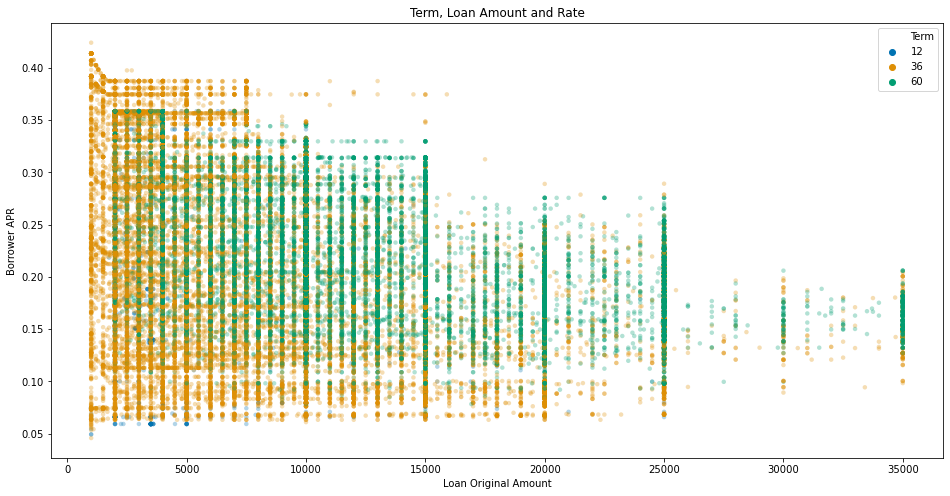

In [17]:
# We check the loan amount vs term, and see if the term makes big difference
plt.subplots(figsize=(16,8))
sb.scatterplot(x=dfr['LoanOriginalAmount'], y=dfr['BorrowerAPR'], hue=dfr['Term'], palette=sb.color_palette('colorblind',
                n_colors=dfr['Term'].nunique()), s=20, edgecolor='none', alpha=0.3, x_jitter=100,)
plt.title('Term, Loan Amount and Rate');
plt.xlabel('Loan Original Amount');
plt.ylabel('Borrower APR');
plt.legend();

##### So it appears that there is some correlation between laon amount and APR, but no much of effect of the term length was obsserved.

### Employment Status, Flat Ownership and the APR

In [18]:
# We first calculate the mean of APR, grouping by Occupation and Employment Status
dfr_emp = dfr.groupby(['EmploymentStatus', 'IsBorrowerHomeowner'])['BorrowerAPR'].mean()
dfr_emp.head(20)

EmploymentStatus  IsBorrowerHomeowner
Employed          False                  0.233896
                  True                   0.214689
Full-time         False                  0.243700
                  True                   0.211692
Not employed      False                  0.293806
                  True                   0.310052
Other             False                  0.274502
                  True                   0.254956
Part-time         False                  0.241455
                  True                   0.234351
Retired           False                  0.256825
                  True                   0.235406
Self-employed     False                  0.253394
                  True                   0.233145
Name: BorrowerAPR, dtype: float64

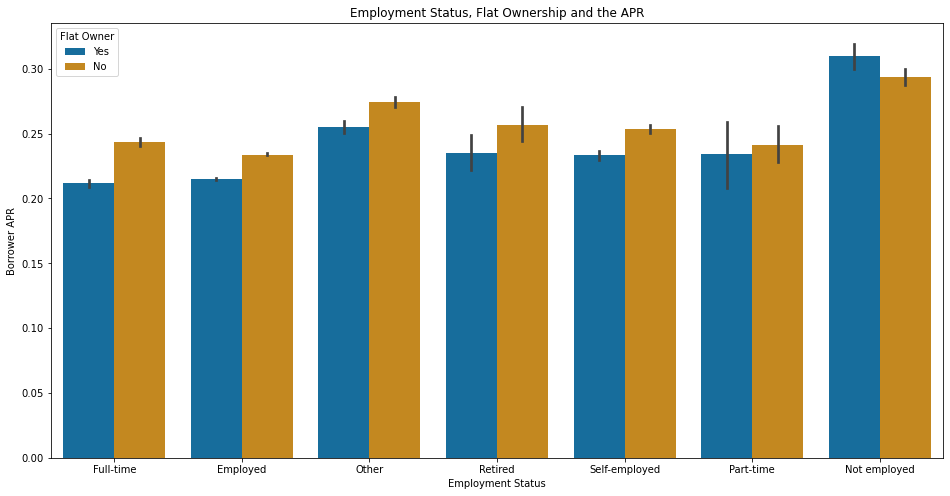

In [19]:
# Let's first change True and False to yes and No
dic = {True: 'Yes', False: 'No'}
dfr['IsBorrowerHomeowner'].replace(dic, inplace=True)
plt.subplots(figsize=(16,8))
sb.barplot(data = dfr, x = 'EmploymentStatus', y = 'BorrowerAPR', hue = 'IsBorrowerHomeowner', 
           palette=sb.color_palette('colorblind', n_colors=2));
plt.title('Employment Status, Flat Ownership and the APR');
plt.xlabel('Employment Status');
plt.ylabel('Borrower APR');
plt.legend(title='Flat Owner');


##### So it appears that flat ownership affects the APR positively except for those who are not employed. That can be a point for further investigation.

##### The relationship between the employment status and the APR do not seem to perfectly correlate. There can be a room for further investigation there, as it'is possible that other criteria factor in, causing what is known as Simpson's paradox.

##### It could very well be that Occupation plays a role here. However, due to the big number of occupations, for the sake of this project we will just study occupation versus APR, regardless of the emplyment status.

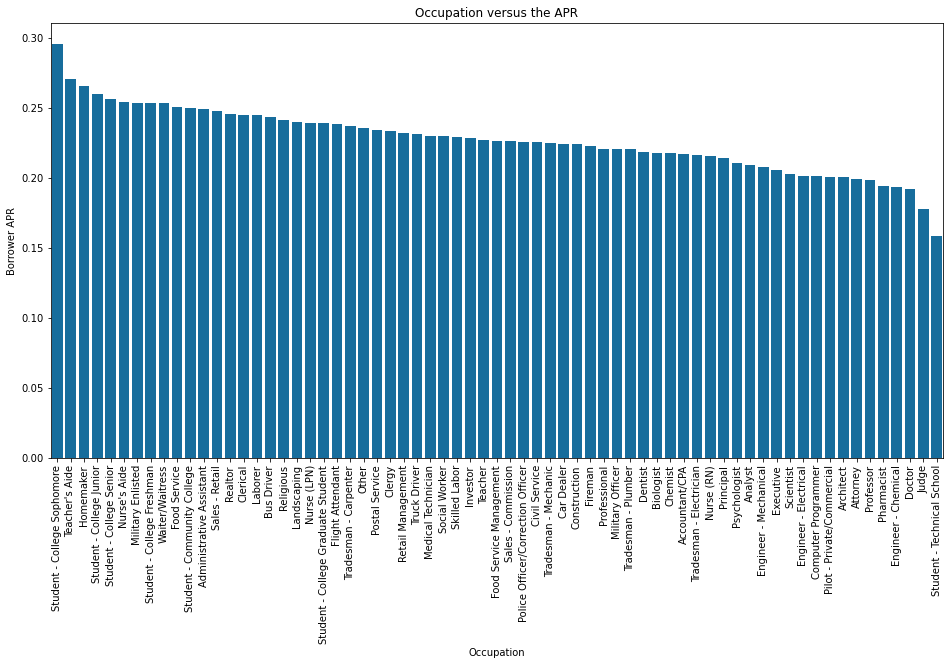

In [20]:
ocp = dfr.groupby('Occupation')['BorrowerAPR'].mean();
ocp.sort_values( ascending=False, inplace=True)
plt.subplots(figsize=(16,8))
sb.barplot(ocp.index, ocp.values, palette=sb.color_palette('colorblind', n_colors=1));
plt.title('Occupation versus the APR');
plt.xlabel('Occupation');
plt.ylabel('Borrower APR');
plt.xticks(rotation=90);

##### That gives some insight on the expected APR for the different occupations, though it is interesting that most students get the highest rate except College Sophomore gets the lowest rate of all occupations.

### Summary
For the purpose of the study, a copy of the dataset was made, including only the most interesting columns. Columns that are missing too many values were not included. Columns that are of interest but have smaller number of missing values were kept, and those records were dropped.
Histograms and scatterplot matrix were plotted for the numerical columns to have a look at the data and have a first look at the expected correlations. Research questions were then formed for those columns and also some Boolean columns. The questions were
* What's the mean loan amounts for each listing category? And what's the total?
* How does APR compare to rate (i.e. overhead on borrower)?
* How does yield compare to estimated return (i.e. deductions from lender)?
* How do rates compare to scores?
* How do the term, loan amount and rate relate?
* Does employment status affect the APR? How about occupation?

While calculating the average credit score, it was noted that that range width is always 19, but that's probably dependant on how the agency calculates it. It was also noted that some proper score records have values of 11, while the dictionary suggest that the values should be from 1 to 10.
While the individual loan amounts were found reasonably varying among the loan category, the total loans amount for each category were found hugely different. Debt Consolidation was found to make the most of the total amount of loans.
Next, I compare rates versus fees and deductions (for both borrowers and lenders). It appears that the difference between Borrower Rate and APR does not change much (with the exception of loans for lower rates, while we see steady increase in the difference between Lender Yield and Estimated Return as the yield increases.
Both plots have fluctuation in the differences, though it is more apparent for the investor.

### Key Insights for Presentation

Does the credit score of a borrower affect the APR rate they pay? Or does the proposer rate correlate with Estimated return for an investor? Scatter plots are plotted for each pair, and it appears there is negative correlation between the rate and the score, although it's less definite for the lender.
As for the loan amount versus the APR, it appears there is some correlation, albeit probably not the strongest. The term, however, does not seem to affect either variables, especially when we look at the 36 and 60-months term. The 12-months had a much smaller number of records, and therefore was not so conclusive.
Then comes the question of how employment status affect APR, and how does ownership of a flat factor in. The relationship between the employment status and the APR do not seem to perfectly correlate. There can be a room for further investigation there, as it is possible that other criteria factor in, causing what is known as Simpson's paradox. It could very well be that Occupation plays a role here. However, due to the big number of occupations, for the sake of this project we will just study occupation versus APR, regardless of the employment status.
It appears that flat ownership affects the APR positively except for those who are not employed. It is possible that banks offer lower rates for unemployed if they do not own a flat, or it could be support from the local authorities. That can be a point for further investigation. 
Even though it didn’t seem very feasible for the size of this project to compare APR to both occupation and employment status at the same time, I thought a starting point would be to see how APR average for occupation, to have some idea about how occupation plays a role and how could it have affected APR by employment status. From the bar plot, we don’t expect drastic effect, although it's interesting that most students get the highest rate except College Sophomore gets the lowest rate of all occupations.
